In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def plot(res, name, gammas, lambdas):
    res_cp = res.copy()
    
    # Create a pivot table for the heatmap
    pivot_res = np.zeros((len(np.unique([d['lambda_'] for d in res])),
                          len(np.unique([d['gamma'] for d in res]))))
    for item in res:
        lambda_idx = np.where(np.unique([d['lambda_'] for d in res]) == item['lambda_'])[0][0]
        gamma_idx = np.where(np.unique([d['gamma'] for d in res]) == item['gamma'])[0][0]
        pivot_res[lambda_idx, gamma_idx] = item['valid_loss']

    # Create a heatmap
    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(pivot_res, annot=True, vmin=0.2, vmax=0.6,
                     fmt=".4f", xticklabels=np.unique([d['gamma'] for d in res]),
                     yticklabels=np.unique([d['lambda_'] for d in res]))

    # Find the position of the minimum value
    res_cp.sort(key=lambda x: x["valid_loss"], reverse=False)
    
    id_opt_gamma = -1
    id_opt_lambda = -1
    
    for i, g in enumerate(gammas):
        if g == res_cp[0]["gamma"]:
            id_opt_gamma = i
            print("best gamma: {}".format(gammas[i]))

    for i, l in enumerate(lambdas):
        if l == res_cp[0]["lambda_"]:
            id_opt_lambda = i
            print("best lambda: {}".format(lambdas[i]))

    # Highlight the minimum value cell by adding a rectangle around it
    ax.add_patch(plt.Rectangle((len(lambdas) - 1 - id_opt_lambda, len(gammas) - 1 - id_opt_gamma), 1, 1, fill=False, edgecolor='red', lw=2))

    plt.xlabel('Gamma')
    plt.ylabel('Lambda')
    plt.title('{} Heatmap'.format(name))
    plt.savefig(os.path.dirname(os.getcwd()) + '/plots/' + 'final_heatmap_{}.png'.format(name))


In [3]:
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
gammas = [0.01, 0.05, 0.1, 0.5, 1]

In [4]:
paths = ["THE-GOOD.pkl", "THE-BAD.pkl", "THE-UGLY.pkl"]

best gamma: 1
best lambda: 1e-05
best gamma: 0.5
best lambda: 0.0001
best gamma: 0.5
best lambda: 0.0001


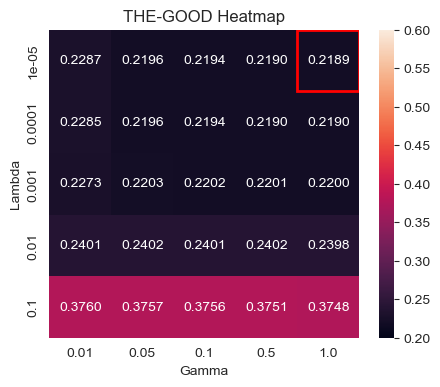

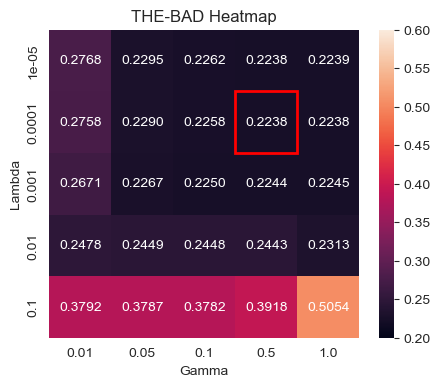

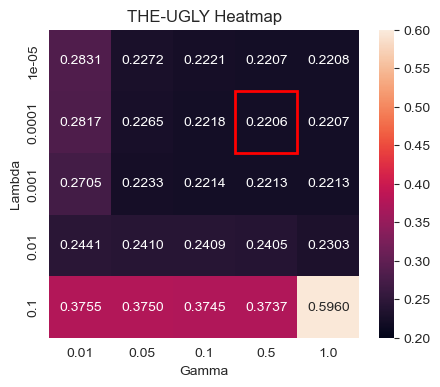

In [5]:
for p in paths:
    with open(p, 'rb') as f:
        res = pickle.load(f)
    plot(res, p.split('.')[0], gammas, lambdas)